Dataset

In [ ]:
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'retina'

Read Dataset

In [3]:
import pandas as pd
df = pd.read_csv('telecom_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


histogram

array([[<Axes: title={'center': 'Total day minutes'}>,
        <Axes: title={'center': 'Total intl calls'}>]], dtype=object)

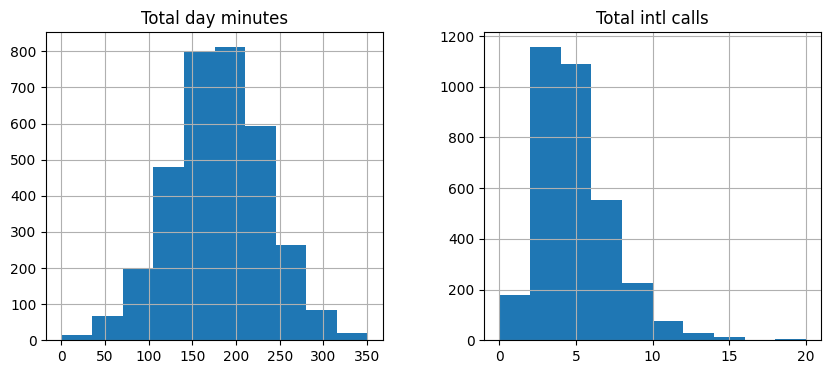

In [4]:
features = ["Total day minutes", "Total intl calls"]
df[features].hist(figsize=(10, 4))

another histogram

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

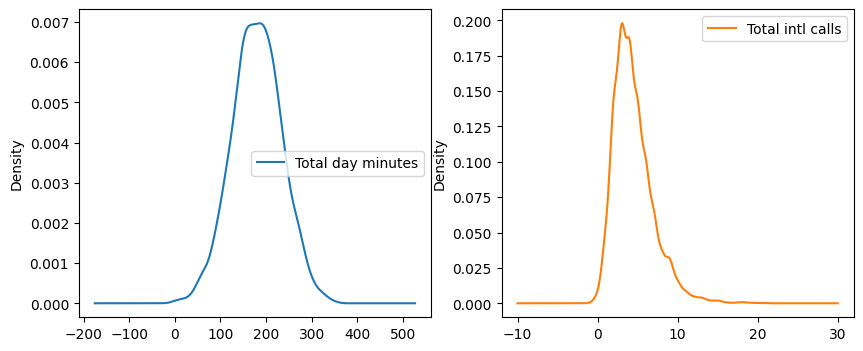

In [ ]:
df[features].plot(
    kind='density', subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
)

distplot chart bar

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_33304\3927754979.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total intl calls'])


<Axes: xlabel='Total intl calls', ylabel='Density'>

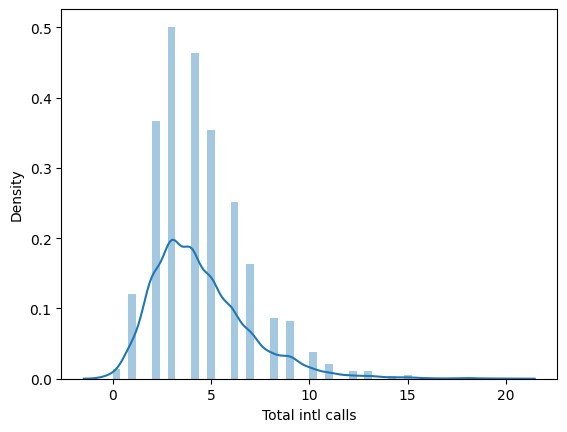

In [10]:
import seaborn as sns
sns.distplot(df['Total intl calls'])

Box plot

<Axes: xlabel='Total intl calls'>

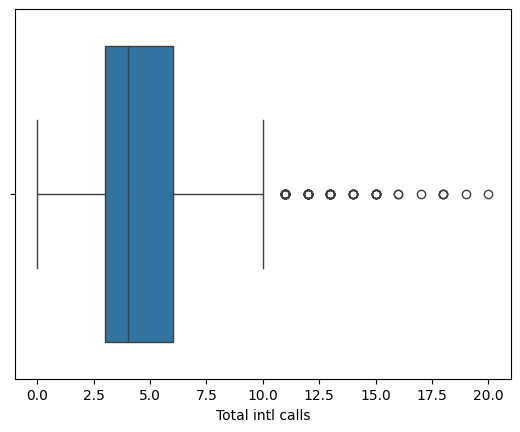

In [12]:
import seaborn as sns
sns.boxplot(x='Total intl calls', data=df)

violin plot

<Axes: ylabel='Total intl calls'>

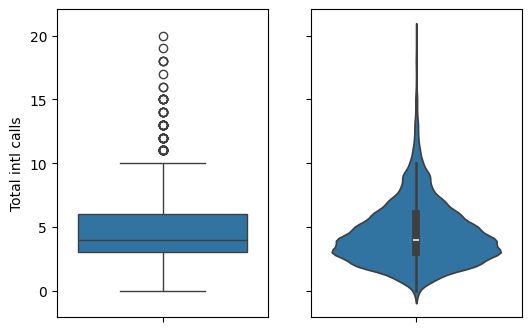

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("telecom_churn.csv")
_, axes = plt.subplots(1,2,sharey=True, figsize=(6,4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1])

describe table

In [9]:
features = ["Total intl calls", "Total day minutes"]
df[features].describe()

,Total intl calls,Total day minutes
count,3333.000000,3333.000000
mean,4.479448,179.775098
std,2.461214,54.467389
min,0.000000,0.000000
25%,3.000000,143.700000
50%,4.000000,179.400000
75%,6.000000,216.400000
max,20.000000,350.800000


frequency table

In [10]:
df["Churn"].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

Bar plot

<Axes: xlabel='State', ylabel='count'>

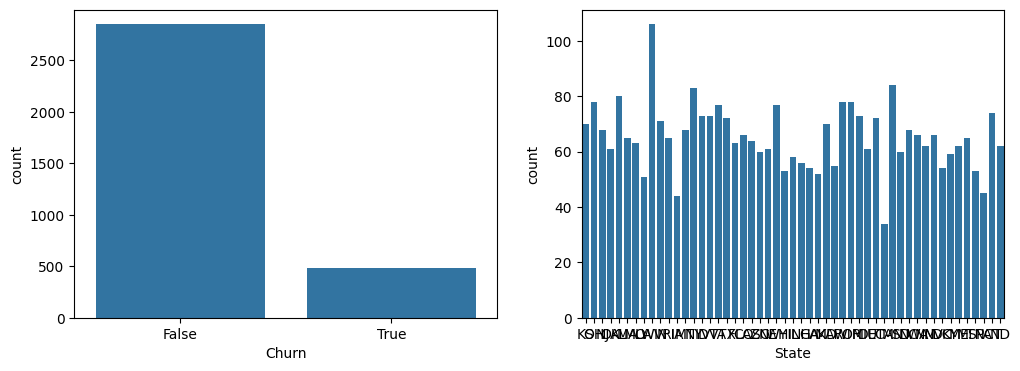

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="State", data=df, ax=axes[1])

correlation matrix

<Axes: >

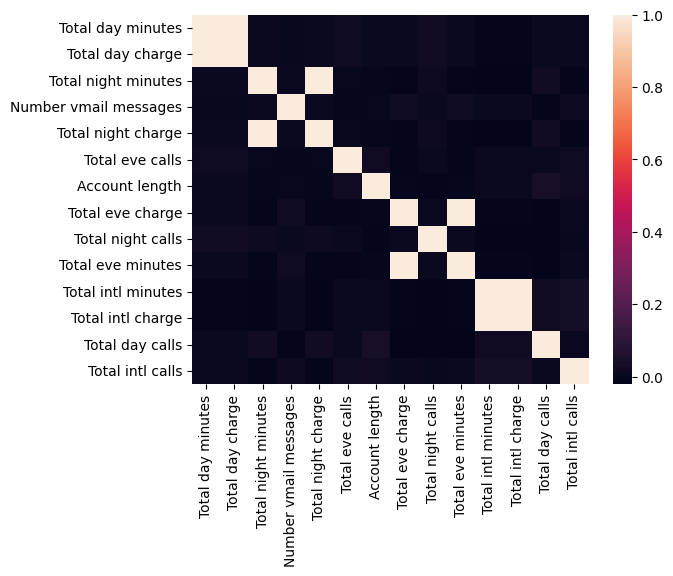

In [26]:
numerical = list(
    set(df.columns)
    - {
        "State",
        "International plan",
        "Voice mail plan",
        "Area code",
        "Churn",
        "Customer service calls",
    }
)
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

another correlation matrix

<Axes: >

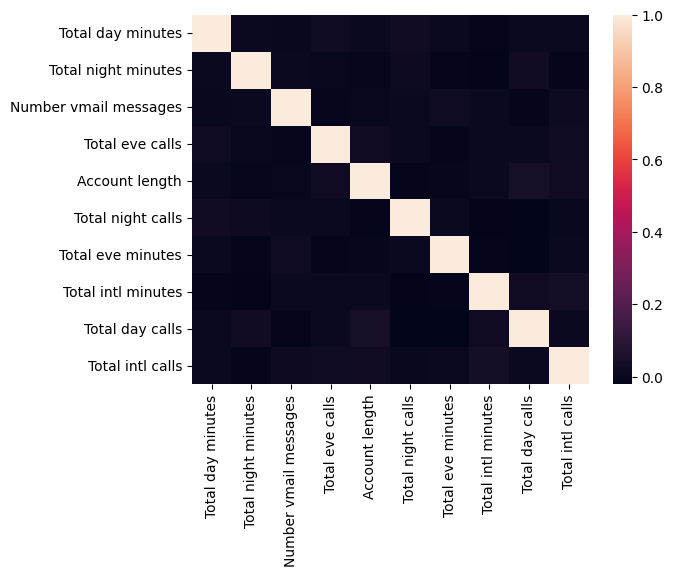

In [28]:
numerical = list(
    set(numerical)
    - {
        "Total day charge",
        "Total eve charge",
        "Total night charge",
        "Total intl charge"
    }
)
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

scatter plot

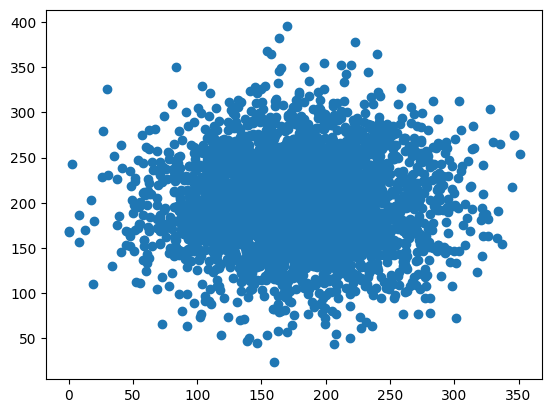

In [32]:
import matplotlib.pyplot as plt
plt.scatter(df["Total day minutes"], df["Total night minutes"])

jointplot

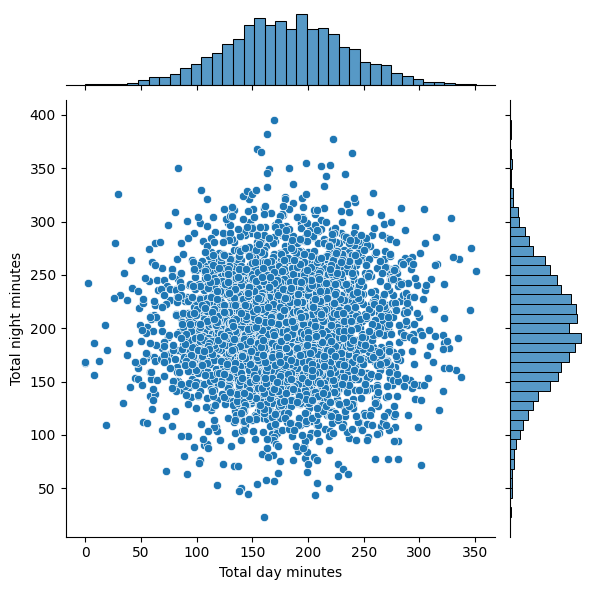

In [33]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter")

pairplot

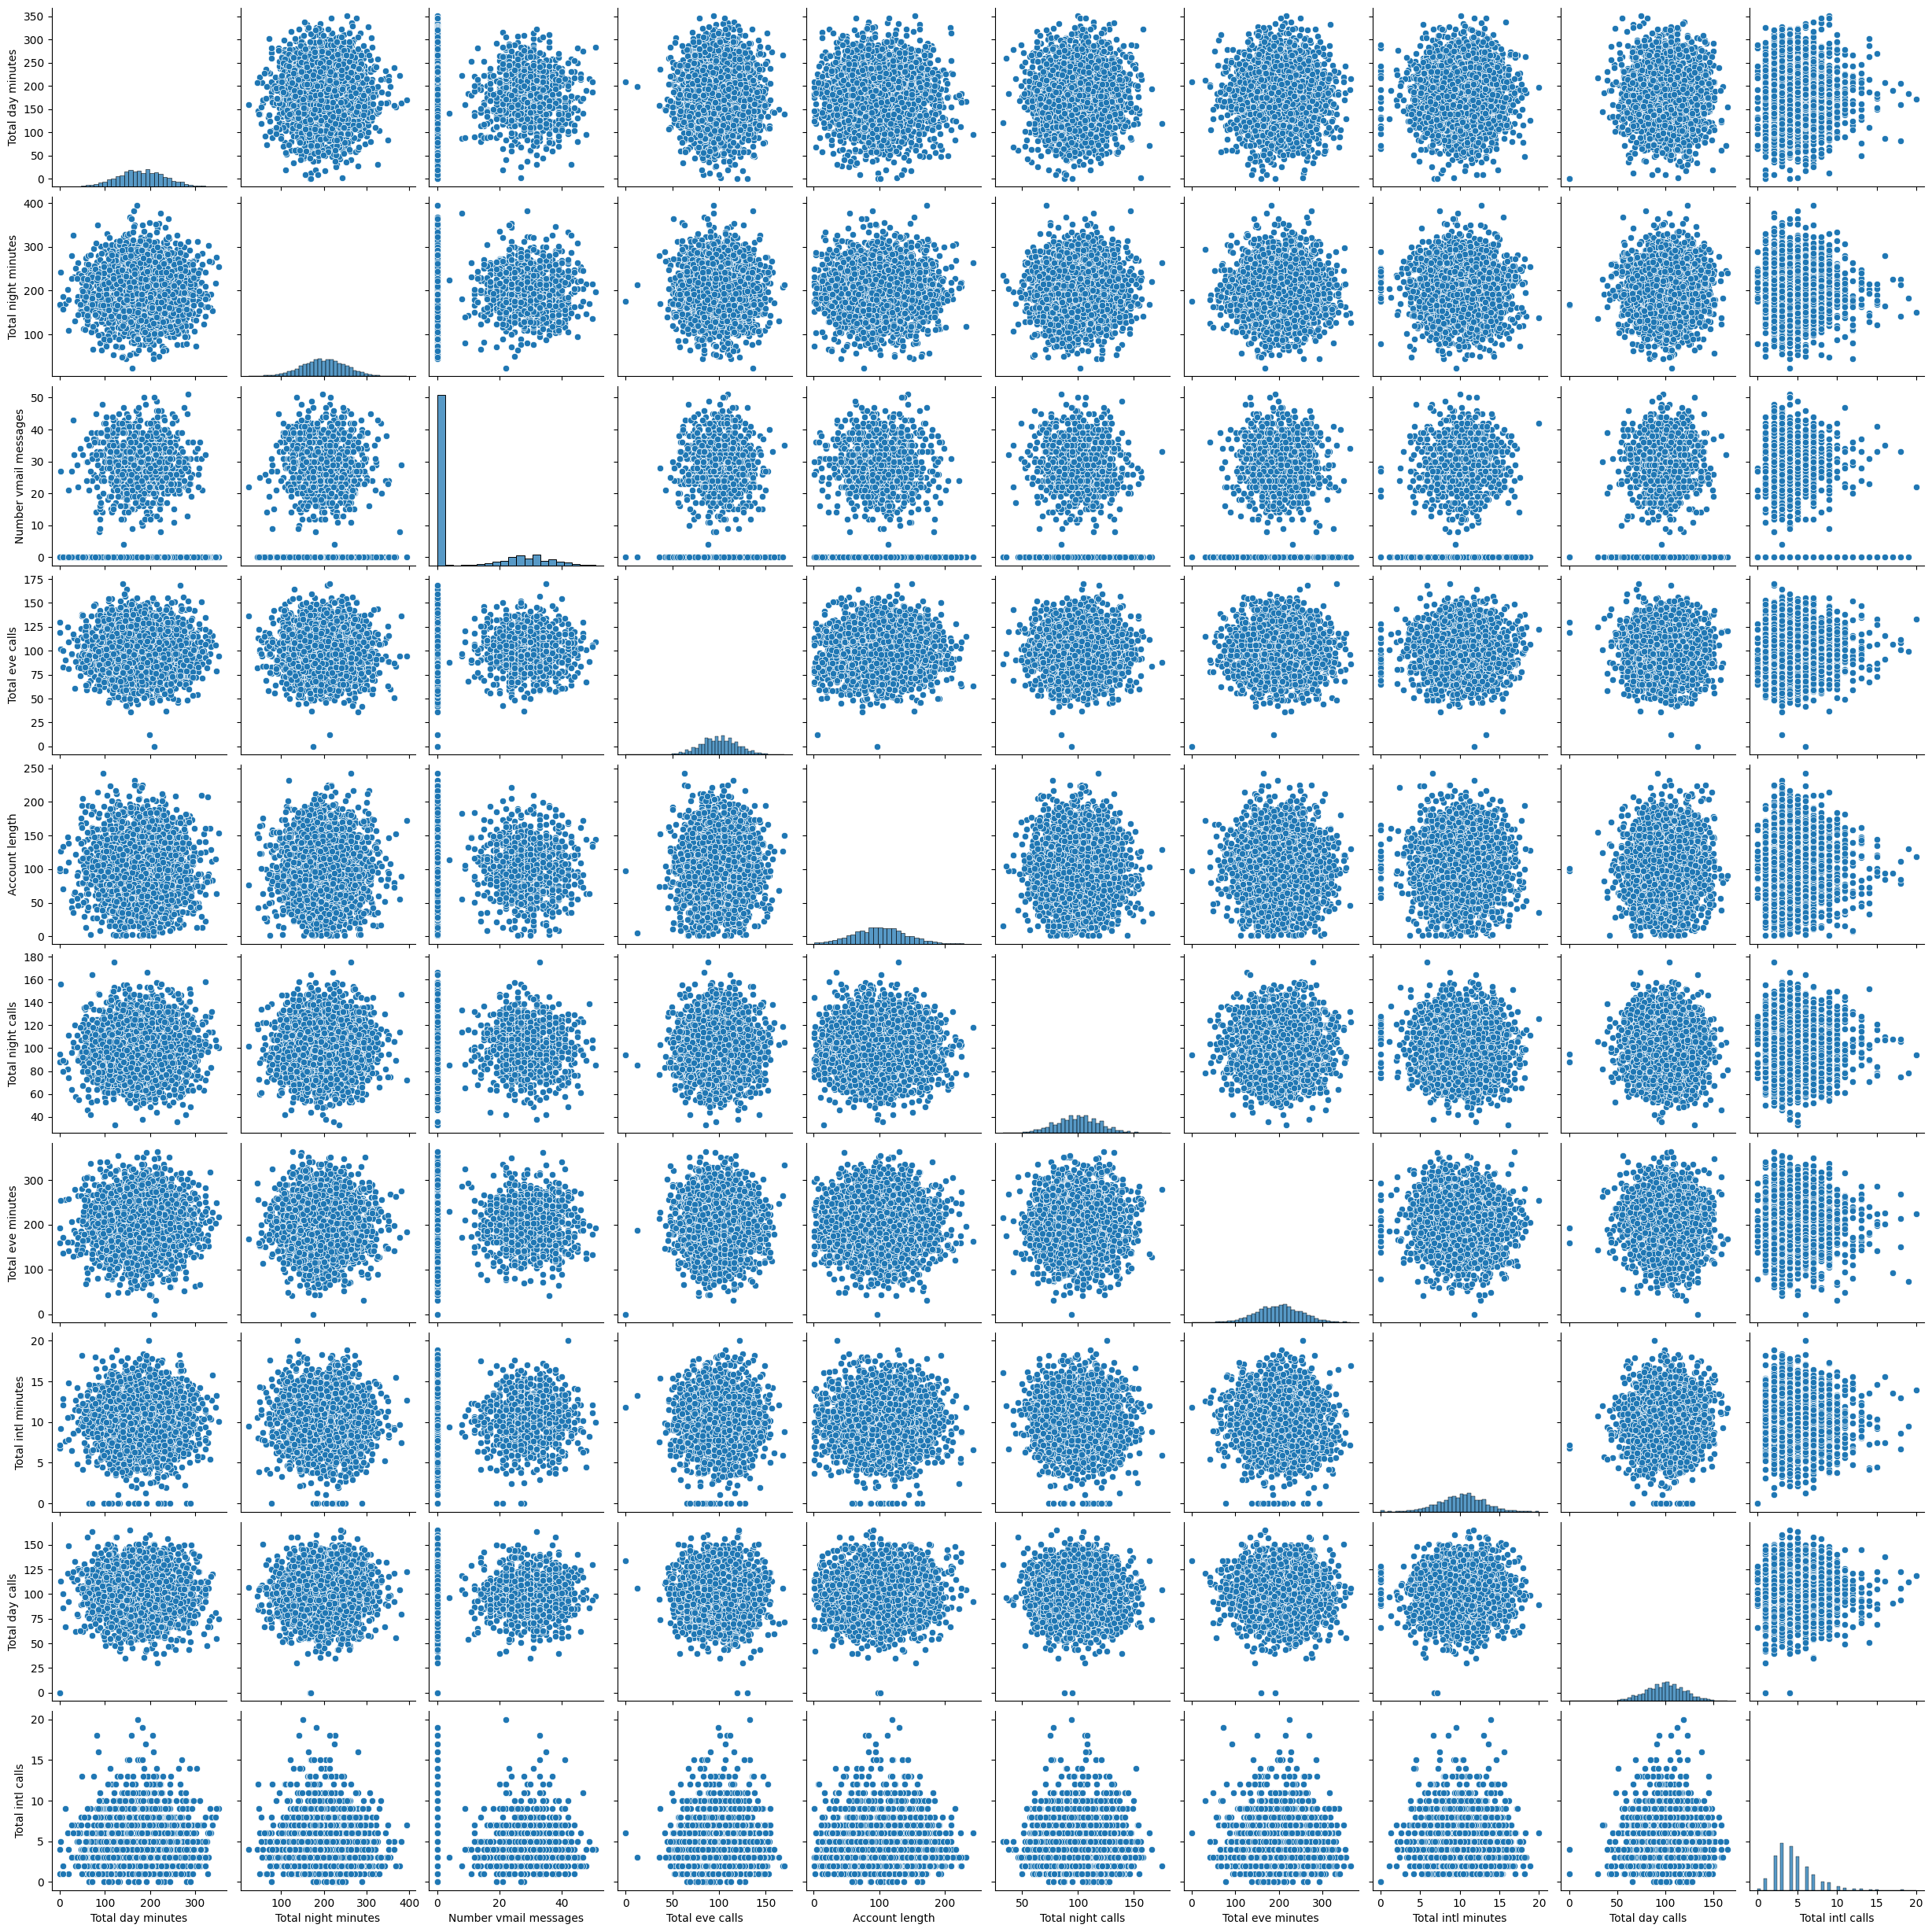

In [34]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical])

tight layout

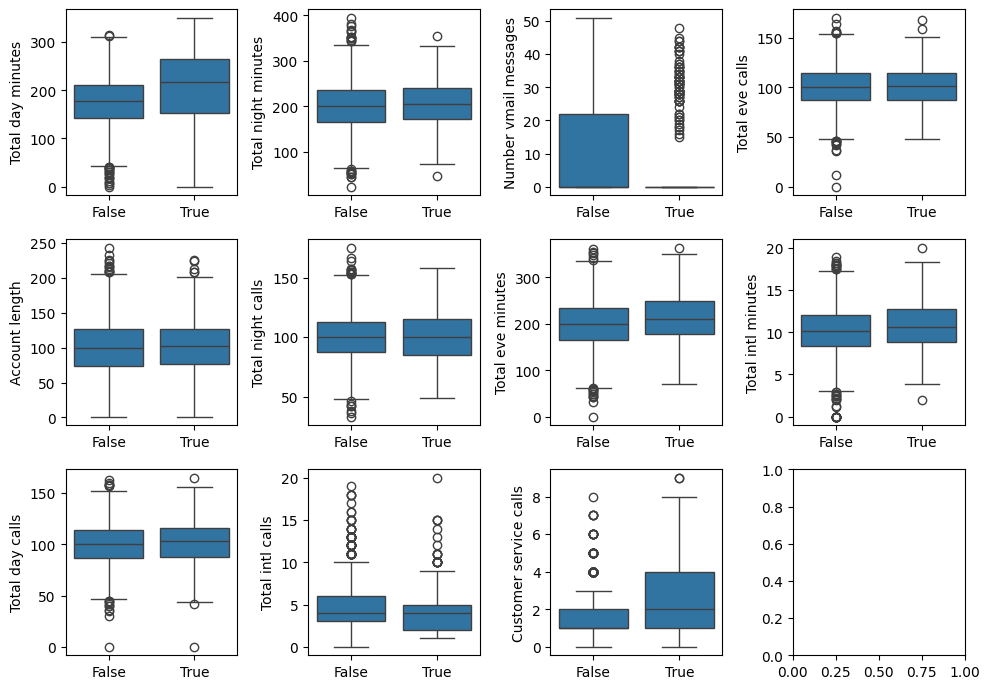

In [35]:
numerical.append("Customer service calls")
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx/4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout()

another box and violin plot

<Axes: xlabel='Churn', ylabel='Total day minutes'>

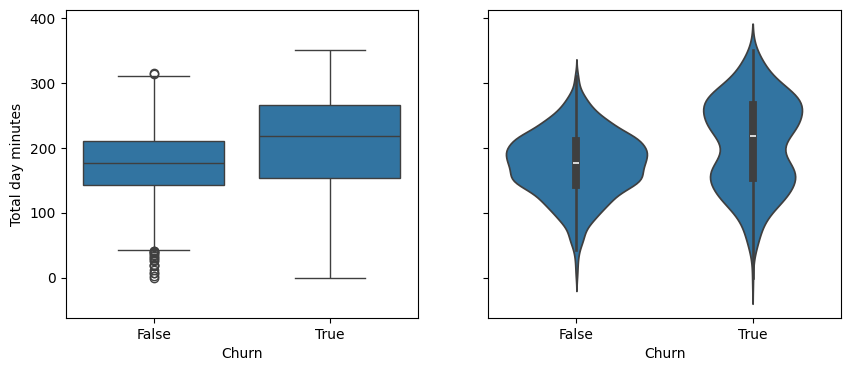

In [36]:
_, axes = plt.subplots(1,2,sharey=True, figsize=(10,4))
sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1])

cat plot

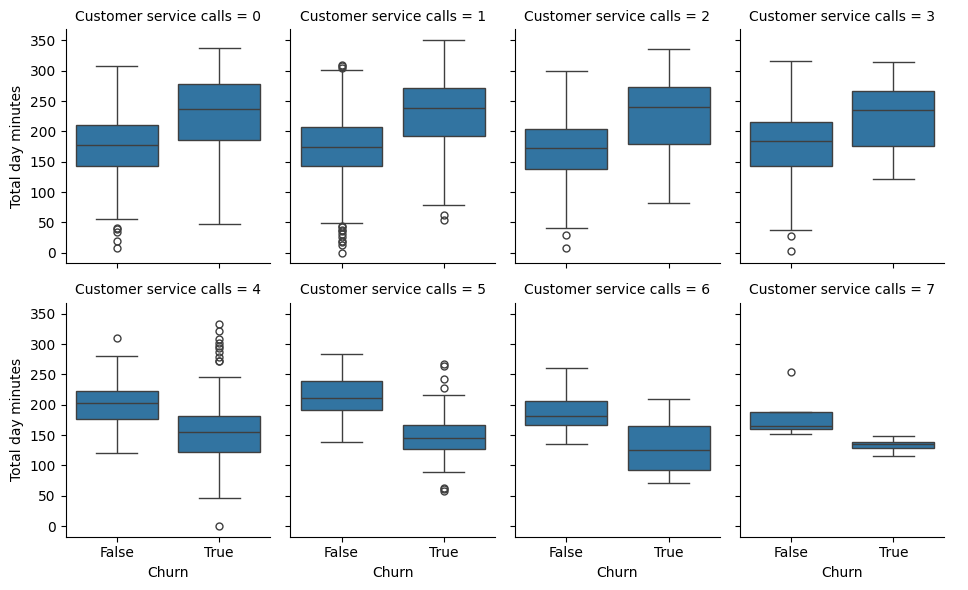

In [37]:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8
)

count plot

<Axes: xlabel='Customer service calls', ylabel='count'>

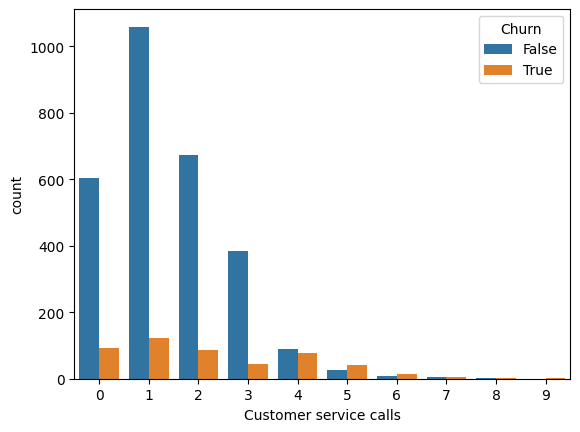

In [38]:
sns.countplot(x="Customer service calls", hue="Churn", data=df)

another count plot

<Axes: xlabel='Voice mail plan', ylabel='count'>

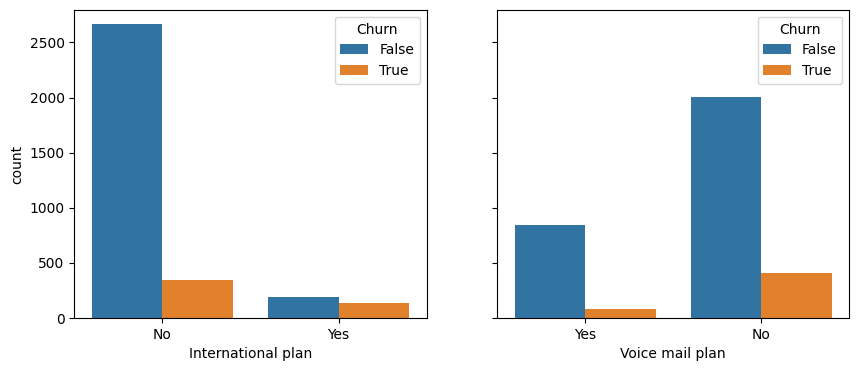

In [39]:
_, axes = plt.subplots(1,2,sharey=True, figsize=(10,4))
sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1])

crosstab

In [40]:
pd.crosstab(df["State"], df["Churn"]).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


group by

In [42]:
import numpy as np
df.groupby(["State"])["Churn"].agg([np.mean]).sort_values(by="mean", ascending=False).T

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13744\655168315.py:2: FutureWarning: The provided callable <function mean at 0x000002844DC1C7C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(["State"])["Churn"].agg([np.mean]).sort_values(by="mean", ascending=False).T


State,CA,NJ,TX,MD,SC,MI,MS,WA,NV,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604
